# -=-=-=-=-=-=-=-=-=-=-Decision Tree and Random Forest-=-=-=-=-=-=-=-=-=-

### Decision Tree
#### General Algorithm
1)  Start at the root node as parent node

2)  Split the parent node at the feature a to minimize the sum of the child node impurities (maximize information gain)

3)  Assign training samples to new child nodes

4)  Stop if leave nodes are pure or early stopping criteria is satisfied, else repeat steps 1 and 2 for each new child node

#### Stopping Rules

A maximal node depth is reached.

Splitting a node does not lead to any information gain.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Entropy Vs. Gini Imputiry

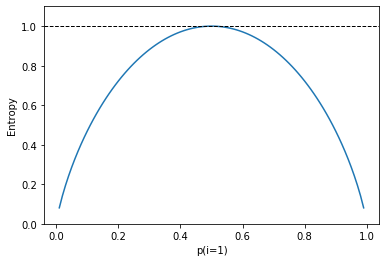

In [2]:
# Entropy metric
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

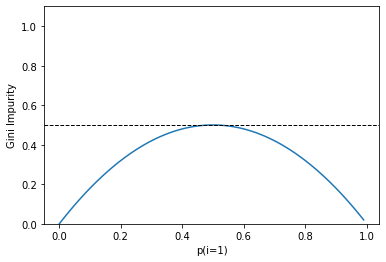

In [3]:
# Gini metric
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, gini(x))
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Gini Impurity')
plt.show()

## Prediction Accuracy by Decision Trees

Here, we are going to load the Ovarian cancer data again. The purpose is to build a tree with training data and apply the test data to the same learned tree and calculate the prediction accuracy.

In [4]:
# Importing the libraries
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Reading the data (features and labels)
data = pd.read_csv('./Data/Data1.csv', header=None) 
x = data.values[:, :100]  
y = data.values[:, 100]

In [6]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [7]:
# Compiling a tree
tree_depth = 2
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth , random_state=0)

# Learning the compiled tree with training data 
clf = clf.fit(x_train, y_train)

In [8]:
# TODO: predict the class labels of test data set using "clf.predict"
y_pred = clf.predict(x_test)

# TODO: Find the accuracy of the model by comparing the achieved class labels and real labels.
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy : ", test_acc)

Test Accuracy :  0.7727272727272727


#### Effect of tree depth on the model performance

In [9]:
d_depth = [1,2,3,4,5,6,7,8,9,10,15,20]
for d in d_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d , random_state=0)
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    print('Test accuracy with depth of {} is {}'.format(d, test_acc))

Test accuracy with depth of 1 is 0.7727272727272727
Test accuracy with depth of 2 is 0.7727272727272727
Test accuracy with depth of 3 is 0.8409090909090909
Test accuracy with depth of 4 is 0.8181818181818182
Test accuracy with depth of 5 is 0.8181818181818182
Test accuracy with depth of 6 is 0.8181818181818182
Test accuracy with depth of 7 is 0.8181818181818182
Test accuracy with depth of 8 is 0.8181818181818182
Test accuracy with depth of 9 is 0.8181818181818182
Test accuracy with depth of 10 is 0.8181818181818182
Test accuracy with depth of 15 is 0.8181818181818182
Test accuracy with depth of 20 is 0.8181818181818182


### Random Forest
#### The same ovarian cancer data will be used to train a Random Forest.

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Compiling a Random Forest model
criterion = 'gini' # 'gini' or 'entropy'
max_depth = None 
random_state = 42
rf_clf = RandomForestClassifier(criterion = criterion,
                            max_depth = max_depth,
                            random_state = random_state)

In [12]:
# Learning the compiled RF with training data
rf_clf.fit(x_train, y_train)
# Predicting the labels of unseen data

y_pred_rf = rf_clf.predict(x_test)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

In [13]:
print('Test accuray of RF model is: {}'.format(test_acc_rf))

Test accuray of RF model is: 0.9090909090909091


#### As you already observed, Random Forest model outperformed the Decision Tree in terms of classification performance.
The complexity of the classification problem, in the following, will be raised by using a bit more challenging data.
The dataset includes 1297 subjects diagnosed with either benign or malignant pulmonary nodules. Each nodule within the CT images were segmented and quantified with 102 features. The task is to predict whether the nodule is benign or malignant.
#### Please note, instead of arbitrarily split the data into train and test sets, we can use k-fold cross validation so that all the data will be used in training and test set alternatively.

In [14]:
# Importing required libraries
from sklearn import preprocessing
from sklearn.model_selection import KFold

In [15]:
# Loading and preparing the dataset
features_df = pd.read_csv("./Data/nodules.csv")    
features_names = list(features_df.keys()) 
features_names = features_names[3:]       # getting the feature names
subject_ids =  list(features_df[features_df.columns[1]]) # get the subject ids
subject_label = np.asarray(list(features_df[features_df.columns[2]])) # get the subject labels
feature_values = features_df.values  # get the feature values
feature_values = feature_values[:,3:] # the first 3 columns contain order, id, labels 
feature_values = feature_values.astype(np.float32)
feature_norm = preprocessing.normalize(feature_values)

In [16]:
# K-fold cross validation initiation
n_fold_split = 5
kf = KFold(n_splits = n_fold_split, random_state = 42, shuffle = True) 
fold_num = 0

In [17]:
for train_index, test_index in kf.split(feature_norm):
    fold_num += 1
    
    x_train = np.asarray(list(feature_norm[i] for i in train_index))  
    x_test = np.asarray(list(feature_norm[i] for i in test_index))
    y_train = np.asarray(list(subject_label[i] for i in train_index))
    y_test = np.asarray(list(subject_label[i] for i in test_index))
    
    rf_clf = RandomForestClassifier(criterion = criterion,
                            max_depth = max_depth,
                            random_state = random_state)
    rf_clf.fit(x_train, y_train)
    y_pred_rf = rf_clf.predict(x_test)
    test_acc_rf = accuracy_score(y_test, y_pred_rf)
    
    print('Prediction accuracy of fold {} is {}'.format(fold_num, test_acc_rf)) 

Prediction accuracy of fold 1 is 0.7269230769230769
Prediction accuracy of fold 2 is 0.7153846153846154
Prediction accuracy of fold 3 is 0.7374517374517374
Prediction accuracy of fold 4 is 0.7683397683397684
Prediction accuracy of fold 5 is 0.7181467181467182


In [18]:
# TODO: Are the observed results of different folds the same? How do you interpret it?
# TODO: How cross-validation would be helpful in machine learning problems?

### Random Forest Feature Importance Visualization
#### In order to understand which of the features contribute more importantly in decision making of the Random Forest, we can visualize the sorted features based on their prediction scores. In the following example, feature importance will be analyzed with 5-fold cross validation.

In [19]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def clf_rf(x_train, y_train, x_test, y_test):
    criterion = 'gini' # 'gini' or 'entropy'
    max_depth = None 
    random_state = 42
    rf = RandomForestClassifier(criterion = criterion,
                                max_depth = max_depth,
                                random_state = random_state)
    rf.fit(x_train, y_train)
    f_importance = rf.feature_importances_
    return f_importance

In [20]:
# Number of important features to be analyzed:
n_best_features = 15

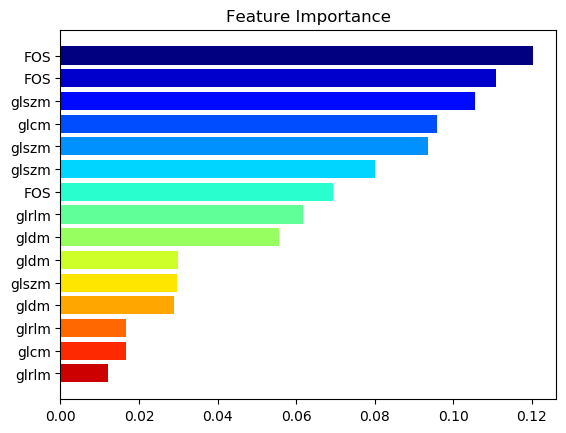

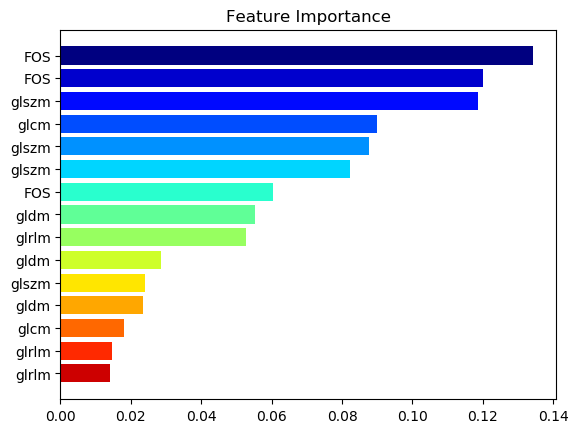

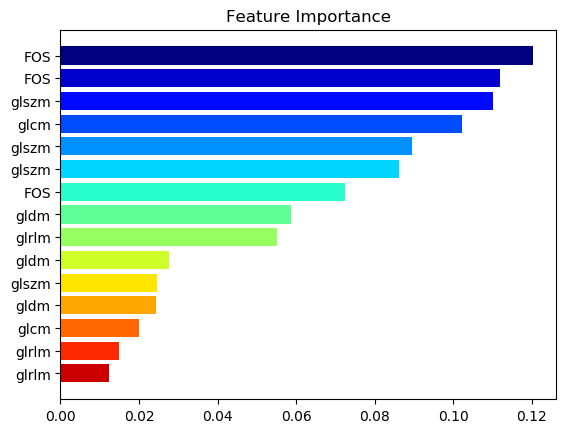

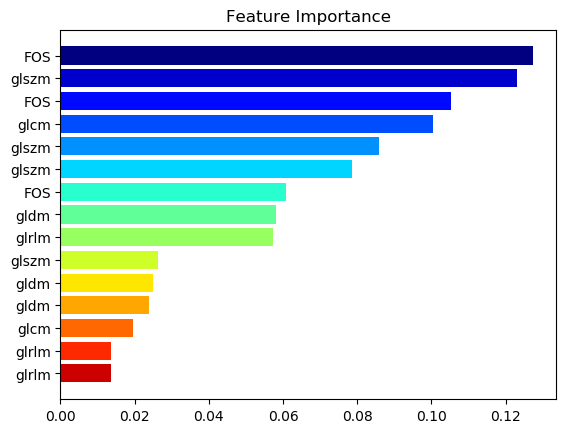

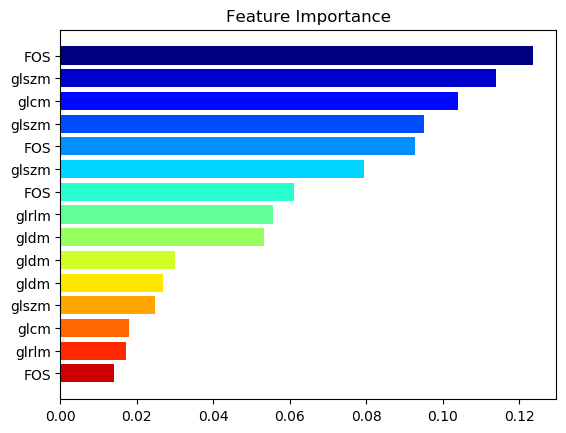

In [21]:
kf = KFold(n_splits = n_fold_split, random_state = 42, shuffle = True) 
fold_num = 0
important_features = {}
for train_index, test_index in kf.split(feature_norm):
    fold_num += 1    
    x_train = list(feature_norm[i] for i in train_index)   
    y_train = list(subject_label[i] for i in train_index) 
    x_test = list(feature_norm[i] for i in test_index)
    y_test = list(subject_label[i] for i in test_index)

    feature_importance = clf_rf(x_train, y_train, x_test, y_test)
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importance)[::-1]
    sorted_names = [features_names[i] for i in indices]    
    top_features = indices[:n_best_features]
    top_sorted_names = sorted_names[:n_best_features]
    short_top_names = []
    # Renaming the plot labels
    for names in top_sorted_names:
        if 'original' in  names:
            begin = 'org'
        else:
            begin = 'filter'
        if 'glszm' in names:
            end = 'glszm'
        elif 'gldm' in names:
            end = 'gldm'
        elif 'glrlm' in names:
            end = 'glrlm'
        elif 'glcm' in names:
            end = 'glcm'
        elif 'firstorder' in names:
            end = 'FOS'
        elif 'shape' in names:
            end = 'shape'
        #full_name = begin+'-'+end
        full_name = end
        short_top_names.append(full_name)

    exp_name = 'importants_'+str(fold_num)        
    important_features[exp_name] = top_sorted_names
    # Horizontal bar plot
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    # Get a color map
    my_cmap = cm.get_cmap('jet')
    # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
    my_norm = Normalize(vmin=0, vmax=n_best_features)
    y_pos = np.arange(len(top_features))   
    ax.barh(y_pos, feature_importance[top_features],
            color=my_cmap(my_norm(y_pos)))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(short_top_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_title('Feature Importance', fontsize=12)    
    plt.show()


In [22]:
# TODO: Are the important features within each folds are consistent?

##### Good Luck